In [26]:
#Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#Step 2: Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


/tmp/ipython-input-7-3338992669.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[idx])])


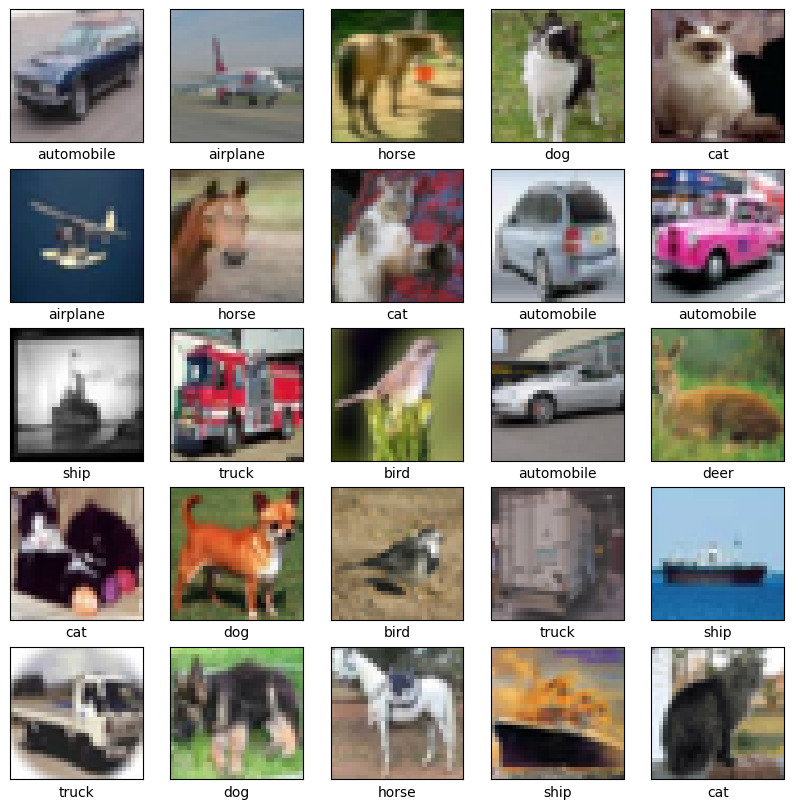

In [7]:
#Step 3: Visualize some sample images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

In [8]:
#Step 4: Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 5: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [9]:
# Step 6: Build Feedforward Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Step 7: Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
#Step 8: Train
from sklearn.model_selection import train_test_split
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# Make the training generator:
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=64)
# Train with explicit validation data:
history = model.fit(train_generator, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4634 - loss: 1.4938 - val_accuracy: 0.4601 - val_loss: 1.5412
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4665 - loss: 1.4914 - val_accuracy: 0.4776 - val_loss: 1.4607
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.4690 - loss: 1.4900 - val_accuracy: 0.4789 - val_loss: 1.4462
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4654 - loss: 1.4903 - val_accuracy: 0.4853 - val_loss: 1.4457
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4719 - loss: 1.4648 - val_accuracy: 0.4899 - val_loss: 1.4250
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 69ms/step - accuracy: 0.4779 - loss: 1.4573 - val_accuracy: 0.4907 - val_loss: 1.4196
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.4755 - loss: 1.4638 - val_accuracy: 0.4864 - val_loss: 1.4445
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4791 - loss: 1.4569 - val_accurac

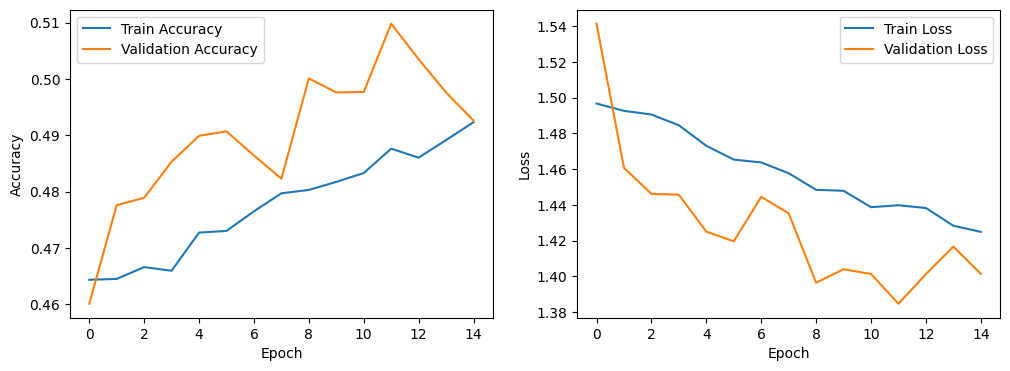

In [13]:
#Step 9: Evaluate & Plot
# Accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


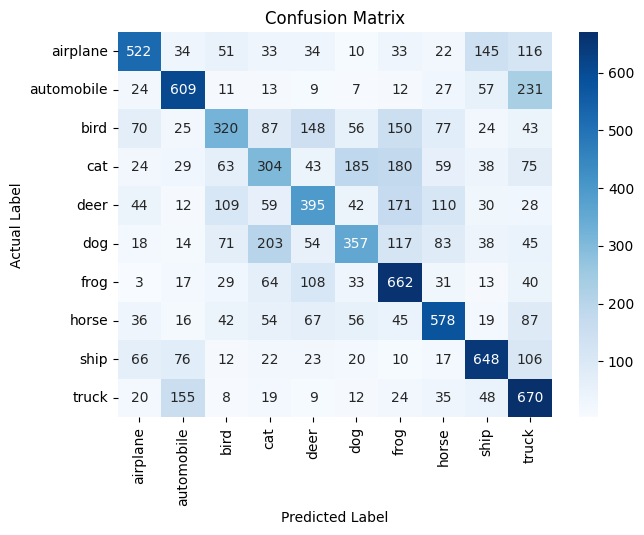

In [20]:
#Evaluate on Test Set: Confusion Matrix & Classification Report

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Flatten true labels (CIFAR-10 labels come as shape (num_samples, 1))
y_true = y_test.flatten()

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix indicates that the model performs better on classes like 'automobile', 'frog', and 'ship', while classes such as 'bird', 'cat', and 'dog' are more frequently misclassified, showing overlaps between similar categories.

In [21]:
# --- Classification Report ---
report = classification_report(
    y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    airplane       0.63      0.52      0.57      1000
  automobile       0.62      0.61      0.61      1000
        bird       0.45      0.32      0.37      1000
         cat       0.35      0.30      0.33      1000
        deer       0.44      0.40      0.42      1000
         dog       0.46      0.36      0.40      1000
        frog       0.47      0.66      0.55      1000
       horse       0.56      0.58      0.57      1000
        ship       0.61      0.65      0.63      1000
       truck       0.46      0.67      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



The overall accuracy on the test set is approximately 51%. The precision, recall, and F1-scores vary significantly across classes. While vehicles like 'automobile' and 'ship' achieve higher scores, animal categories like 'bird' and 'cat' remain challenging for this feedforward network

**Model Improvements**

In [27]:
#Stronger Data Augmentation
strong_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
strong_datagen.fit(x_train)

In [28]:
#Split training manually for validation
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [29]:
#Try deeper architecture
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Try a different optimizer
optimizer_choice = RMSprop(learning_rate=0.001)
# You could swap: SGD(learning_rate=0.01) OR Adam()

model.compile(
    optimizer=optimizer_choice,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
# Train with stronger augmentation
train_generator = strong_datagen.flow(x_train_split, y_train_split, batch_size=64)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 96ms/step - accuracy: 0.1804 - loss: 2.5068 - val_accuracy: 0.2625 - val_loss: 2.0329
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.2835 - loss: 1.9650 - val_accuracy: 0.3475 - val_loss: 1.8015
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 98ms/step - accuracy: 0.3141 - loss: 1.8906 - val_accuracy: 0.3746 - val_loss: 1.7511
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.3270 - loss: 1.8604 - val_accuracy: 0.3636 - val_loss: 1.7503
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.3370 - loss: 1.8301 - val_accuracy: 0.3876 - val_loss: 1.7020
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.3494 - loss: 1.8003 - val_accuracy: 0.3954 - val_loss: 1.6796
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.3557 - loss: 1.7865 - val_accuracy: 0.3957 - val_loss: 1.6562
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.3537 - loss: 1.7711 - val_accurac

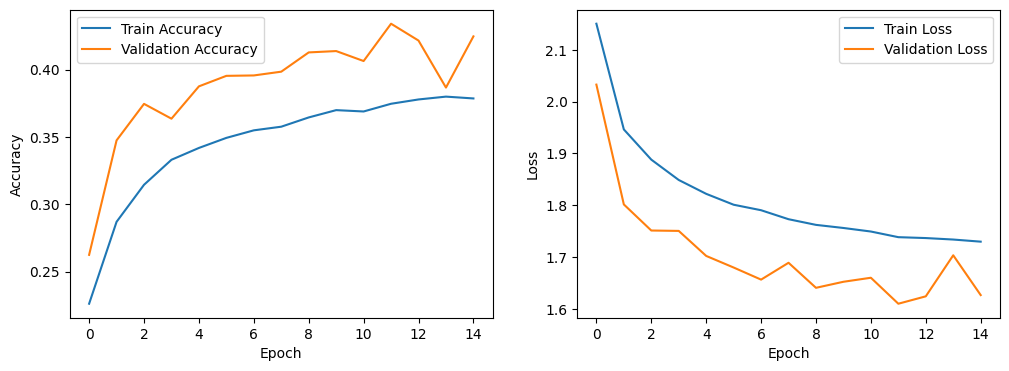

In [32]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The improved version shows that adding stronger data augmentation and deeper layers increases generalization stability by preventing overfitting, as seen in the small gap between training and validation curves. While final accuracy remained close to the baseline (~42%), the smoother loss trend and balanced accuracy lines indicate the model is better regularized and more robust to new data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


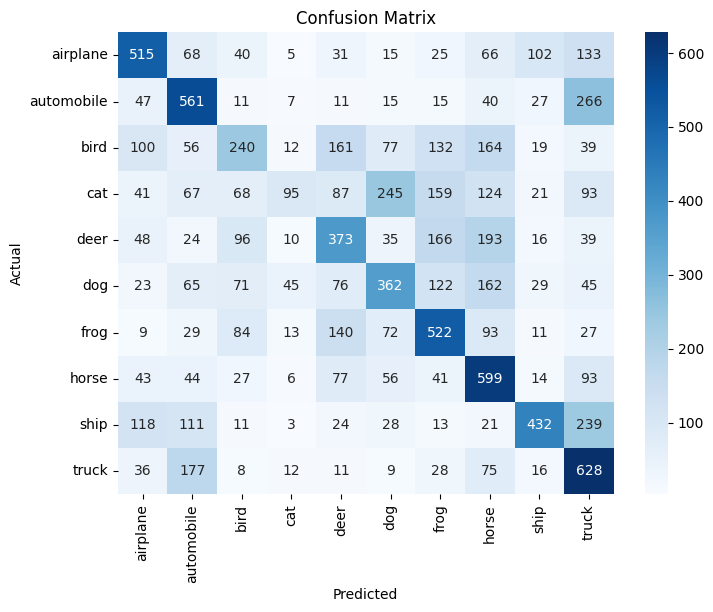

              precision    recall  f1-score   support

    airplane       0.53      0.52      0.52      1000
  automobile       0.47      0.56      0.51      1000
        bird       0.37      0.24      0.29      1000
         cat       0.46      0.10      0.16      1000
        deer       0.38      0.37      0.37      1000
         dog       0.40      0.36      0.38      1000
        frog       0.43      0.52      0.47      1000
       horse       0.39      0.60      0.47      1000
        ship       0.63      0.43      0.51      1000
       truck       0.39      0.63      0.48      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.42     10000
weighted avg       0.44      0.43      0.42     10000



In [35]:
# Evaluate on test set
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))

The improved version used deeper layers, a different optimizer, and stronger data augmentation. This made the model’s training more stable and reduced overfitting, as seen by smoother accuracy and loss curves and a smaller gap between training and validation performance. However, despite this improved generalization, the overall test accuracy and F1-scores remained lower than the baseline (~43% vs ~51%) because the fully connected architecture could not fully exploit the richer data variations created by augmentation. This highlights that while regularization and deeper capacity help, they require a suitable architecture.